In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


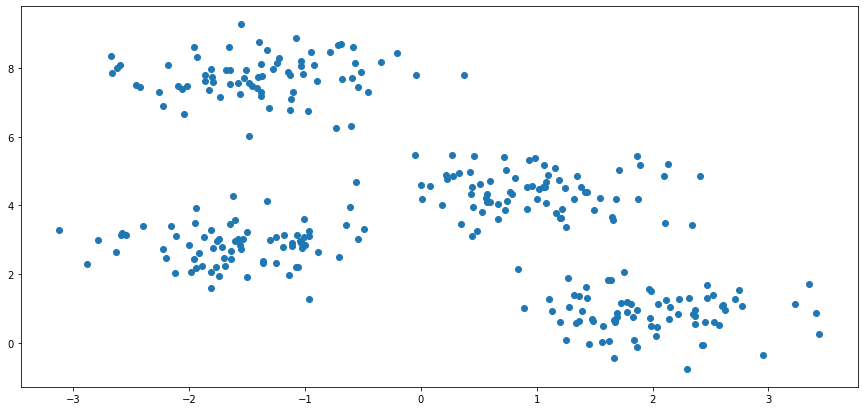

In [2]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.figure(figsize=(15,7))
plt.scatter(X[:,0], X[:,1])
plt.show()

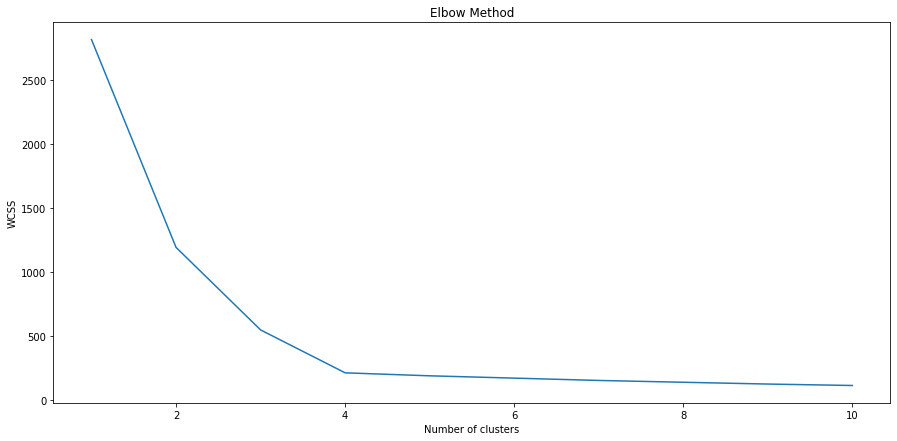

In [3]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15,7))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

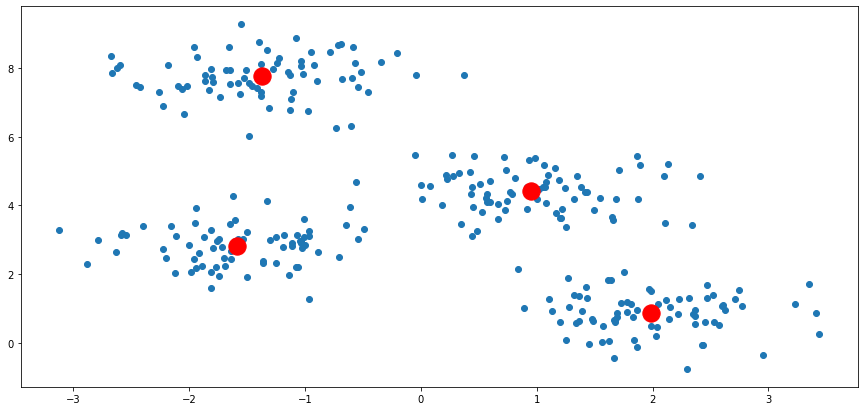

In [3]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.figure(figsize=(15,7))
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

# Implement KMeans

you will need

1. function to return clusters (in any way you think is ok) for the given data and centroids

2. function to return centroids (in any way you think is ok) for the given data

3. several iterations over steps 1 and 2

In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
import random

In [55]:
def clusters(X,k):
    for n in range(3):
        r=random.sample(list(X),k)
        X=np.asarray(X)
        r=np.asarray(r)
        d=[]
        d1=[]
        dist1=[]
        dist2=[]
        distance=[]
        min_index=[]
        min_distance1=[]
        min_distance2=[]
        lst=[]
        for i in range(len(X)):   
            for k in range(len(r)):
                for j in range(X.shape[1]):
                    d.append((X[i][j]-r[k][j])**2)


        for z in range(int(len(d)/X.shape[1])):
            dist1.append(d[2*z])
            dist2.append(d[2*z+1])  
        dist1=[dist1[l:l+5] for l in range(0,len(X)*len(r),len(r))]
        dist2=[dist2[l:l+5] for l in range(0,len(X)*len(r),len(r))]

        for l in range(len(X)*len(r)):
            d1.append(d[2*l]+d[2*l+1])


        distance=[d1[l:l+5] for l in range(0,len(X)*len(r),len(r))]


        for idx in range(len(distance)):
            min_index.append(distance[idx].index(min(distance[idx])))
            min_distance1.append(min(dist1[idx]))
            min_distance2.append(min(dist2[idx]))

        lst.append(min_distance1)
        lst.append(min_distance2)


        df=pd.DataFrame(np.asarray(lst).T,index=min_index, columns=["Center1","Center2"])
        cdf=df.groupby(df.index)[["Center1","Center2"]].mean()
        r_final=np.asarray(cdf[["Center1", "Center2"]])
        r=r_final
        print(cdf)

In [56]:
X, y = make_blobs(n_samples=400)
clusters(X,5)

      Center1   Center2
0    0.102163  0.716173
1  187.192694  0.397399
2    0.074645  0.447052
3    0.148282  0.508633
4    0.165052  0.852117
     Center1   Center2
0   0.032373  0.523860
1   0.132567  6.149613
2  91.847521  1.185423
3   0.174836  0.158747
4  18.684755  2.791743
    Center1   Center2
0  0.262773  2.575102
1  0.287656  3.172787
2  1.385939  2.156360
3  0.130296  2.952093
4  0.154437  4.396921
